# Communicate

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Trade-offs

Step 1️⃣ - Model benefits

We estimate the potential lifts between +1% and +4%


In [2]:
lift = np.arange(0.01, 0.05, 0.01)
benefits = pd.DataFrame({'lift': lift, 
                        'benefit': 100000*20*lift})
benefits

,lift,benefit
0,0.01,20000.0
1,0.02,40000.0
2,0.03,60000.0
3,0.04,80000.0


Step 2️⃣ - Model costs

- ***f***(number of days of engineering team)
- Estimated between a 20 and 50 days

In [3]:
mandays = np.arange(20, 60, 10)

costs = pd.DataFrame({'mandays':mandays, 
                     'cost': mandays*500*3})
costs

,mandays,cost
0,20,30000
1,30,45000
2,40,60000
3,50,75000


In [4]:
benefits['ones'] = 1
benefits

,lift,benefit,ones
0,0.01,20000.0,1
1,0.02,40000.0,1
2,0.03,60000.0,1
3,0.04,80000.0,1


In [5]:
costs['ones'] = 1
costs

,mandays,cost,ones
0,20,30000,1
1,30,45000,1
2,40,60000,1
3,50,75000,1


In [6]:
# Create the cartesian product of two dataframes
sensitivity = pd.merge(costs, benefits, on='ones').drop('ones', axis=1)
sensitivity

,mandays,cost,lift,benefit
0,20,30000,0.01,20000.0
1,20,30000,0.02,40000.0
2,20,30000,0.03,60000.0
3,20,30000,0.04,80000.0
4,30,45000,0.01,20000.0
5,30,45000,0.02,40000.0
6,30,45000,0.03,60000.0
7,30,45000,0.04,80000.0
8,40,60000,0.01,20000.0
9,40,60000,0.02,40000.0


In [7]:
sensitivity['net_profit'] = sensitivity['benefit'] - sensitivity['cost']
sensitivity

,mandays,cost,lift,benefit,net_profit
0,20,30000,0.01,20000.0,-10000.0
1,20,30000,0.02,40000.0,10000.0
2,20,30000,0.03,60000.0,30000.0
3,20,30000,0.04,80000.0,50000.0
4,30,45000,0.01,20000.0,-25000.0
5,30,45000,0.02,40000.0,-5000.0
6,30,45000,0.03,60000.0,15000.0
7,30,45000,0.04,80000.0,35000.0
8,40,60000,0.01,20000.0,-40000.0
9,40,60000,0.02,40000.0,-20000.0


In [9]:
s = sensitivity[['lift', 'mandays', 'net_profit']]
s

,lift,mandays,net_profit
0,0.01,20,-10000.0
1,0.02,20,10000.0
2,0.03,20,30000.0
3,0.04,20,50000.0
4,0.01,30,-25000.0
5,0.02,30,-5000.0
6,0.03,30,15000.0
7,0.04,30,35000.0
8,0.01,40,-40000.0
9,0.02,40,-20000.0


In [10]:
s_pivot = s.pivot(index='lift', columns='mandays', values='net_profit')
s_pivot

mandays,20,30,40,50
lift,,,,
0.01,-10000.0,-25000.0,-40000.0,-55000.0
0.02,10000.0,-5000.0,-20000.0,-35000.0
0.03,30000.0,15000.0,0.0,-15000.0
0.04,50000.0,35000.0,20000.0,5000.0


In [13]:
s.set_index(['lift', 'mandays'])

,,net_profit
lift,mandays,
0.01,20,-10000.0
0.02,20,10000.0
0.03,20,30000.0
0.04,20,50000.0
0.01,30,-25000.0
0.02,30,-5000.0
0.03,30,15000.0
0.04,30,35000.0
0.01,40,-40000.0


In [14]:
s.set_index(['lift', 'mandays']).unstack()

net_profit                           
mandays         20       30       40       50
lift                                         
0.01      -10000.0 -25000.0 -40000.0 -55000.0
0.02       10000.0  -5000.0 -20000.0 -35000.0
0.03       30000.0  15000.0      0.0 -15000.0
0.04       50000.0  35000.0  20000.0   5000.0

In [15]:
s_pivot.style.applymap(lambda x : 'color: red' if x < 0 else 'color: black')

mandays,20,30,40,50
lift,,,,
0.01,-10000.000000,-25000.000000,-40000.000000,-55000.000000
0.02,10000.000000,-5000.000000,-20000.000000,-35000.000000
0.03,30000.000000,15000.000000,0.000000,-15000.000000
0.04,50000.000000,35000.000000,20000.000000,5000.000000


## `args` and `kwargs`

In [43]:
import pandas as pd

In [48]:
pd.DataFrame.from_dict({'a': [1], 'b': [2]})

,a,b
0,1,2


In [49]:
pd.DataFrame.from_dict({'a': [1], 'b': [2]}, bar=5)

TypeError: from_dict() got an unexpected keyword argument 'bar'

In [25]:
def foo(required, *args, **kwargs):
    """This is the function docstring"""
    print(required)
    if args:
        print(args)
    if kwargs:
        print(kwargs)

In [22]:
foo(1)

1


In [23]:
foo('hello')

hello


In [26]:
foo(1, 2)

1
(2,)


In [27]:
foo(1,2,3)

1
(2, 3)


In [28]:
foo(1,2,3, 'hello')

1
(2, 3, 'hello')


In [51]:
foo(1, 2, 3, bar = 5)

1
(2, 3)
{'bar': 5}


In [30]:
foo(1, 2, 3, bar = 5, test='hi')

1
(2, 3)
{'bar': 5, 'test': 'hi'}


In [37]:
a_list = [1,2,3, {'a':0}]
a_dict = {'bar': 5}

In [32]:
foo(a_list)

[1, 2, 3]


In [38]:
foo(*a_list) # foo(1,2,3)

1
(2, 3, {'a': 0})


In [39]:
foo(a_dict)

{'bar': 5}


In [40]:
foo(**a_dict) # foo(bar = 5)

TypeError: foo() missing 1 required positional argument: 'required'

In [41]:
foo(1, **a_dict)

1
{'bar': 5}


In [42]:
foo(*a_list, **a_dict)

1
(2, 3, {'a': 0})
{'bar': 5}


In [52]:
class Student:
    school = 'lewagon'
    def __init__(self, name, age):
        self.name = name
        self.age = age

In [53]:
alice = Student('alice', 20)

In [54]:
alice.__dict__

{'name': 'alice', 'age': 20}

In [55]:
alice.school

'lewagon'

In [57]:
d = {'a':1, 'b':2}
d

{'a': 1, 'b': 2}

In [58]:
d.update(c=3)
d

{'a': 1, 'b': 2, 'c': 3}

In [59]:
# Student class with allowed optional attributes
class Student:
    school = 'lewagon'

    def __init__(self, name, age, **kwargs):
        self.name = name
        self.age = age
        self.course = None        # new students have not chosen a course yet!

        self.__dict__.update(**kwargs)

In [60]:
alice = Student('alice', 20, nationality='french')
alice.nationality

'french'

In [61]:
alice.__dict__

{'name': 'alice', 'age': 20, 'course': None, 'nationality': 'french'}

In [62]:
alice = Student('alice', 20, nationality='french', bar = 5, test=[1,2,3])
alice.__dict__

{'name': 'alice',
 'age': 20,
 'course': None,
 'nationality': 'french',
 'bar': 5,
 'test': [1, 2, 3]}

## Typing Hints

In [70]:
def say_hi(name: str) -> str:
    '''The name will say hi'''
    return name + ' says Hi!'

say_hi('alice')

'alice says Hi!'

## Interactive Tools

In [71]:
# start at 6min30, stops at 9min17
from IPython.display import HTML, IFrame
IFrame("http://www.youtube.com/embed/8QiPFmIMxFc?t=388", width="560", height="315")

**ipywidgets**

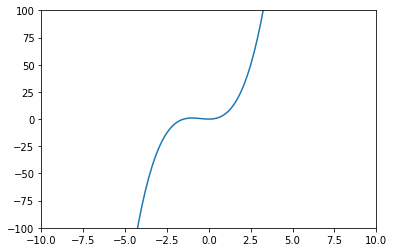

In [72]:
def plot_polynom(a=[0,1,2,3], b=2):
    x = np.arange(-10, 10, 0.1)
    y = a*x**3+ b*x**2    
    plt.plot(x,y); plt.xlim(xmin=-10, xmax=10); plt.ylim(ymin=-100, ymax=100)
    
plot_polynom(a=2, b=3)

In [7]:
from ipywidgets import interact

@interact
def plot_polynom(a=[0,1,2,3], b=2, grid=False):
    x = np.arange(-10, 10, 0.1)
    y = a*x**3+ b*x**2    
    plt.plot(x,y); plt.xlim(xmin=-10, xmax=10); plt.ylim(ymin=-100, ymax=100); 
    if grid:
        plt.grid();

interactive(children=(Dropdown(description='a', options=(0, 2, 4, 6, 8, 10), value=0), IntSlider(value=2, desc…

🤔Python decorators @

In [78]:
def my_decorator(func):
    def wrapper():
        print("I'm before the method call")
        func()
        print("I'm after the method call")
    return wrapper

def say():
    print("hi!")
    
say = my_decorator(say)

say()

I'm before the method call
hi!
I'm after the method call


In [79]:
@my_decorator
def say():
    print("hi!")
    
say()

I'm before the method call
hi!
I'm after the method call


$f(x) = a*x$ 😁